<a href="https://colab.research.google.com/github/FarazAhmad2/Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Importing required libraries
import numpy as np
# To handle the dataset
import pandas as pd

# For plots and visualizations
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer

# For getting optimal number of clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage
# To scale the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# metrics to evaluate the clusters
from sklearn.metrics import silhouette_score, silhouette_samples
# Clustering alorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# Display utilities
from IPython.display import Markdown, display

# activating DND to disregard the warnings by goiing silent mode
import warnings
warnings.filterwarnings('ignore')

# setting default parameters for the plots
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams["figure.dpi"] = 150

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filepath = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Customer Segmentation - Faraz Ahmad/Online Retail.xlsx'
df = pd.read_excel(filepath)

In [4]:
# Checking shape pf dataframe
df.shape

(541909, 8)

In [5]:
# Checking top 5 entries
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# Checking bottom 5 entries
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
# Checking null counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# <b> Data cleaning </b>

In [9]:
# Missing data counts and percentage
missing = df.columns[df.isnull().any()].tolist()

print('Missing Data Count')
print(df[missing].isnull().sum().sort_values(ascending = False))
print('---'*8)
print('Missing Data Percentage')
print(round(df[missing].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
CustomerID     135080
Description      1454
dtype: int64
------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


* 24.93% of items purchases are not assigned to any customer.
* Hence there is no use of having the data with no customer assignment. Because we can't form clusters without CustomerID so we will delete them from dataset.

In [10]:
# Dropping the rows with null values
df.dropna(inplace=True)

In [11]:
# Checking duplicate values
len(df[df.duplicated()])

5225

In [12]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [13]:
# Checking null counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


# <b> Feature engineering </b>

In [14]:
# Creating new features from the datetime column InvoiceDate
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df['Month'] = df['InvoiceDate'].apply(lambda x: x.month_name())
df['Day'] = df['InvoiceDate'].apply(lambda x: x.day_name())
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)

In [15]:
# Creating a new feature 'TotalAmount' by multiplying Quantity and UnitPrice
df['TotalAmount'] = df['Quantity']*df['UnitPrice']

In [16]:
# Creating a new feature 'TimeType' based on hours to define whether its Morning,Afternoon or Evening
df['TimeType'] = np.where((df["hour"]>5)&(df["hour"]<18), np.where(
                           df["hour"]<12, 'Morning','Afternoon'),'Evening')

### <b> We have to drop some  InvoiceNo  which are starts with 'c' because 'c', it indicates a cancellation </b>

In [17]:
# We have to drop some  InvoiceNo  which are starts with 'c' because 'c', it indicates a cancellation
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
cancellations = df[df['InvoiceNo'].str.contains('C')]
cancellations.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,Month,Day,hour,TotalAmount,TimeType
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,December,Wednesday,9,-27.50,Morning
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,December,Wednesday,9,-4.65,Morning
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,December,Wednesday,10,-19.80,Morning
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,December,Wednesday,10,-6.96,Morning
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,December,Wednesday,10,-6.96,Morning


In [18]:
df = df[~df['InvoiceNo'].str.contains('C')]

# <b> Exploratory data analysis </b>

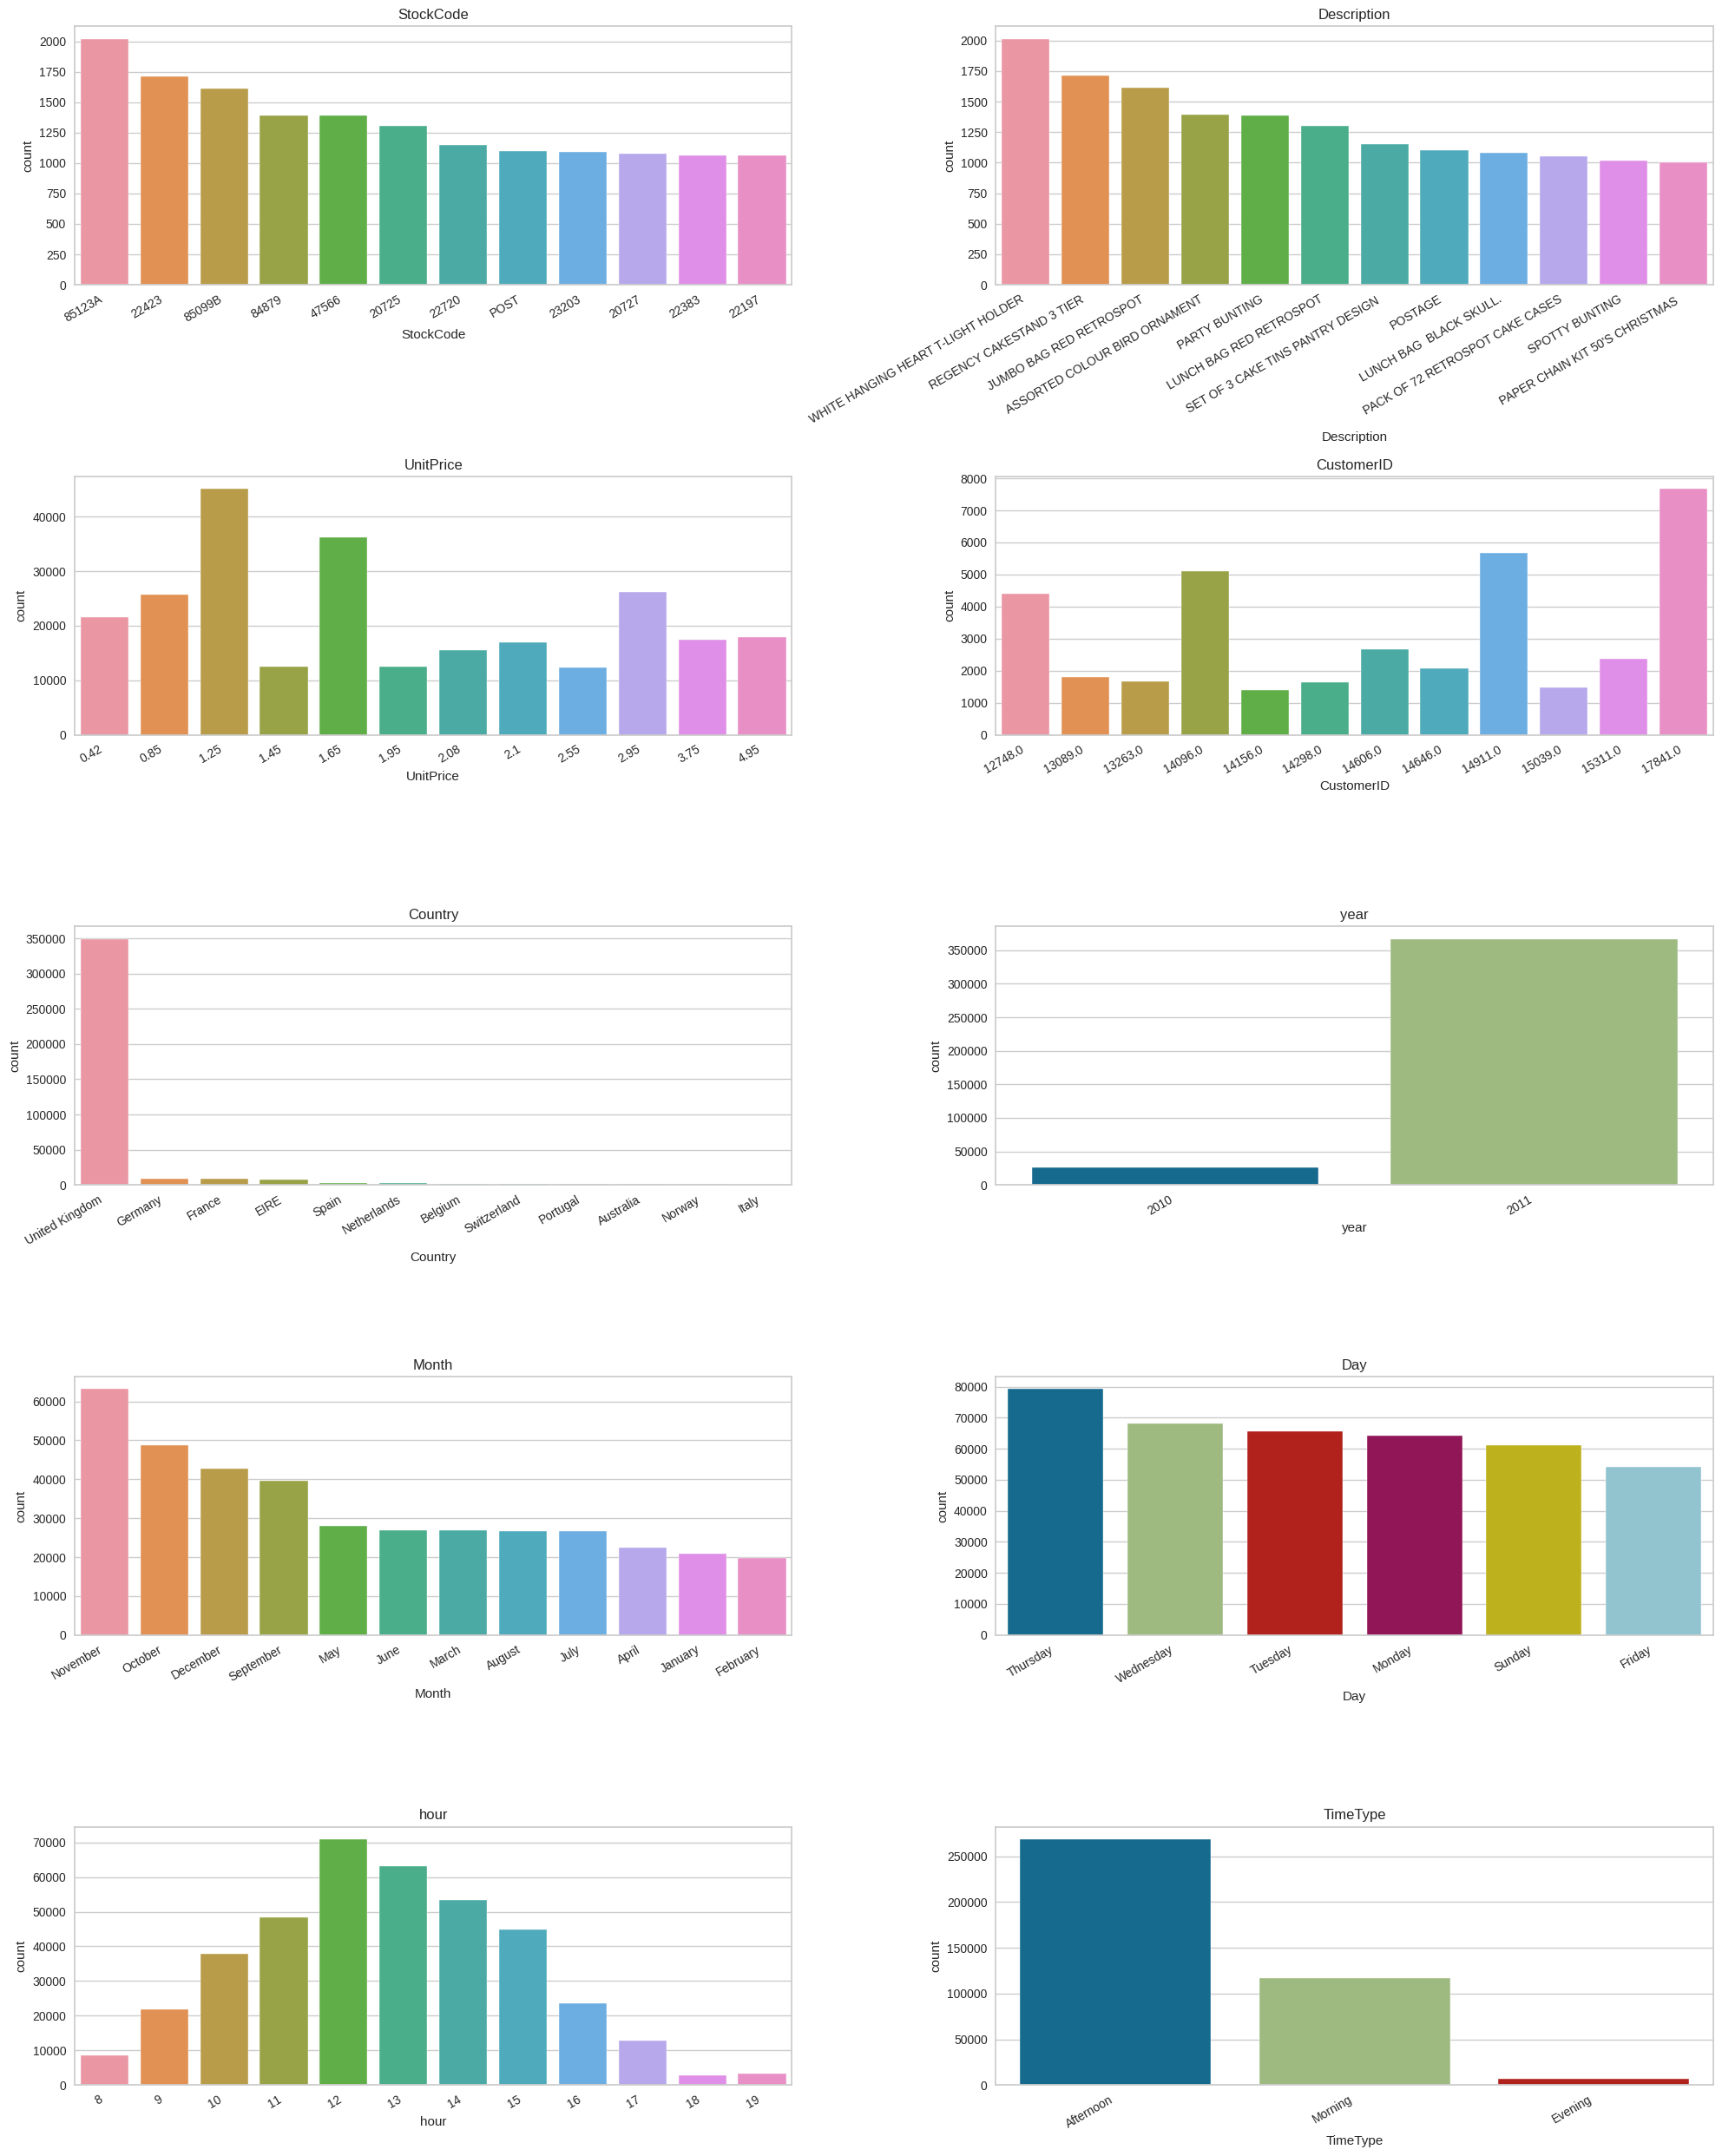

In [19]:
# Plotting top values based on frequency in each column
target = ['StockCode', 'Description','UnitPrice', 'CustomerID', 'Country',
          'year', 'Month','Day','hour','TimeType']

plt.figure(figsize=(20,25), dpi=100)
for n,col in enumerate(target):
  plt.subplot(5, 2, n+1)
  temp = df[col].value_counts().reset_index().head(12)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col)
  plt.xticks(rotation=30, ha='right')
  plt.tight_layout()

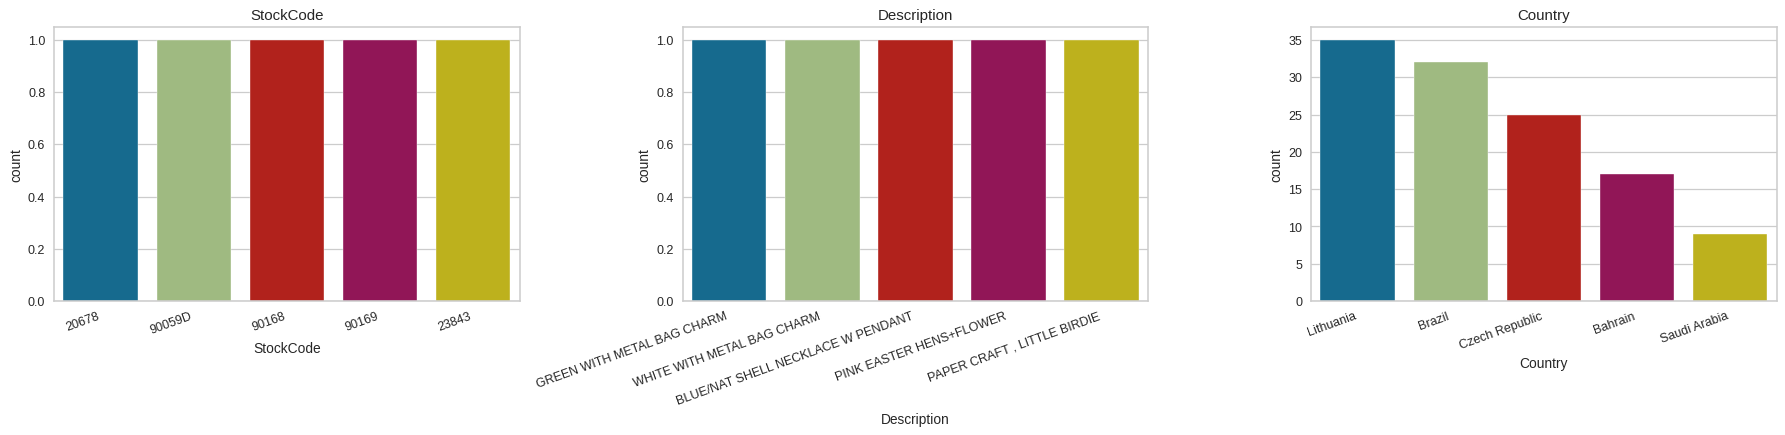

In [20]:
# Plotting Bottom 5 values based on frequency in each column
target = ['StockCode', 'Description','Country']
plt.figure(figsize=(20,5), dpi=90)
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  temp = df[col].value_counts().reset_index().tail(5)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col)
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

* Most Customers are from United Kingdom. Considerable number of customers are also from Germany, France, EIRE and Spain. Whereas Saudi Arabia, Bahrain, Czech Republic, Brazil and Lithuania has least number of customers.
* There are no orders placed on Saturdays. Looks like it's a non working day for the retailer.
* Most of the customers have purchased the gifts in the month of November, October, December and September. Less number of customers have purchased the gifts in the month of April, January and February.
*Most of the customers have purchased the items in Afternoon, moderate numbers of customers have purchased the items in Morning and the least in Evening.
* WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT are the most ordered products.

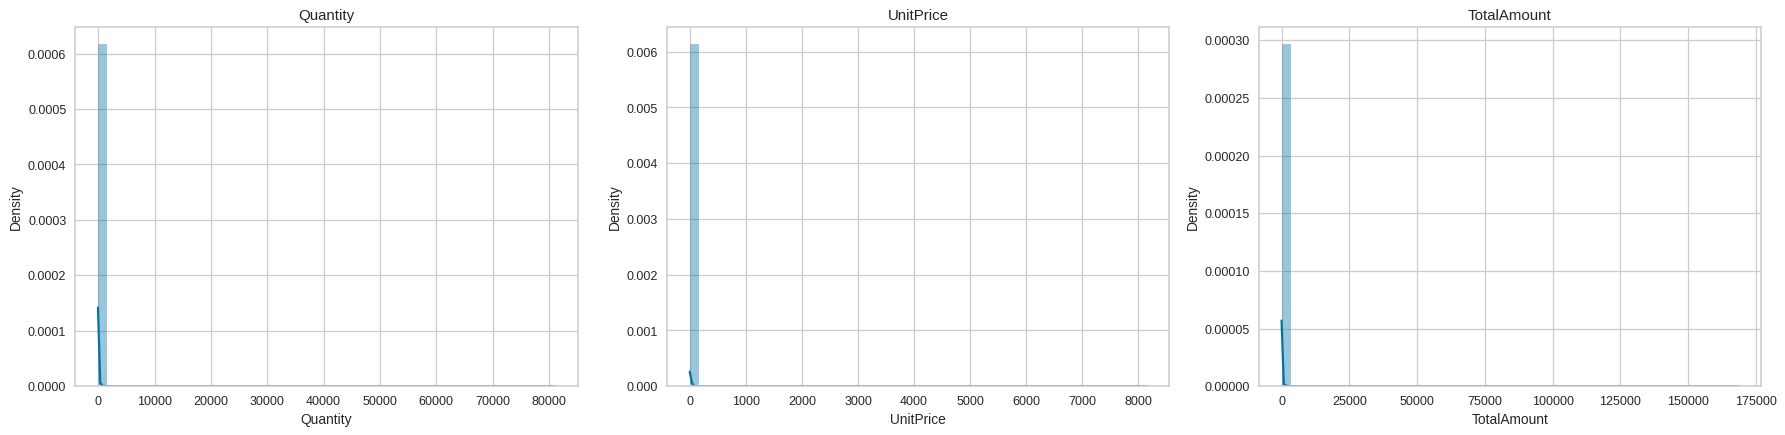

In [21]:
# Visualizing the distributions.
target = ['Quantity','UnitPrice','TotalAmount']
plt.figure(figsize=(20,5), dpi=90)
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  sns.distplot(df[col])
  plt.title(col)
  plt.tight_layout()

* It shows a positively skewed distribution because most of the values are clustered around the left side of the distribution while the right tail of the distribution is longer, which means mean>median>mode.
* For symmetric graph mean=median=mode.

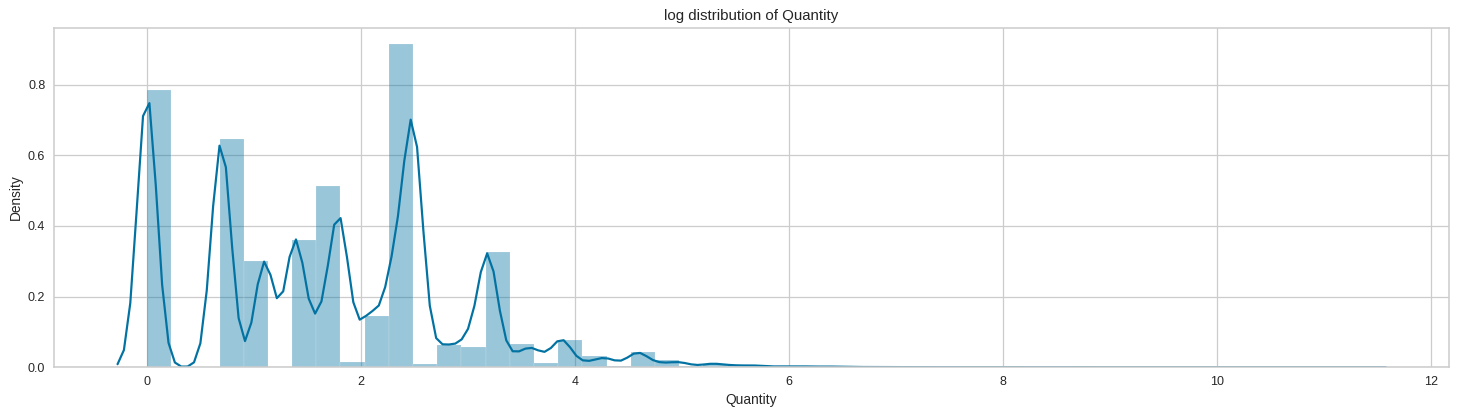

In [22]:
# Visualizing the distributions after log transformation of Quantity
plt.figure(figsize=(20,5), dpi=90)
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']))
plt.show()

In [23]:
# Most orders placed are from these countries
country_invoice = df.groupby('Country')['InvoiceNo'].nunique().reset_index().sort_values('InvoiceNo',ascending=False)
country_invoice.rename(columns={'InvoiceNo': 'Invoice_Count'}, inplace=True)
country_invoice.head()

,Country,Invoice_Count
35,United Kingdom,16649
14,Germany,457
13,France,389
10,EIRE,260
3,Belgium,98


United Kingdom is making most of the purchases as compared to other countries.

In [24]:
# Function for plotting bar plots
def plot_bar(dataset,x,y,ttl1,ttl2):
  plt.figure(figsize=(20,5), dpi=90)
  plt.subplot(1,2,1)
  plt.xticks(rotation=20,ha='right')
  plt.title(ttl1)
  sns.barplot(data=dataset.head(10),x=x, y=y)

  plt.subplot(1,2,2)
  plt.xticks(rotation=20, ha='right')
  plt.title(ttl2)
  sns.barplot(data=dataset.tail(10), x=x, y=y)
  plt.show()

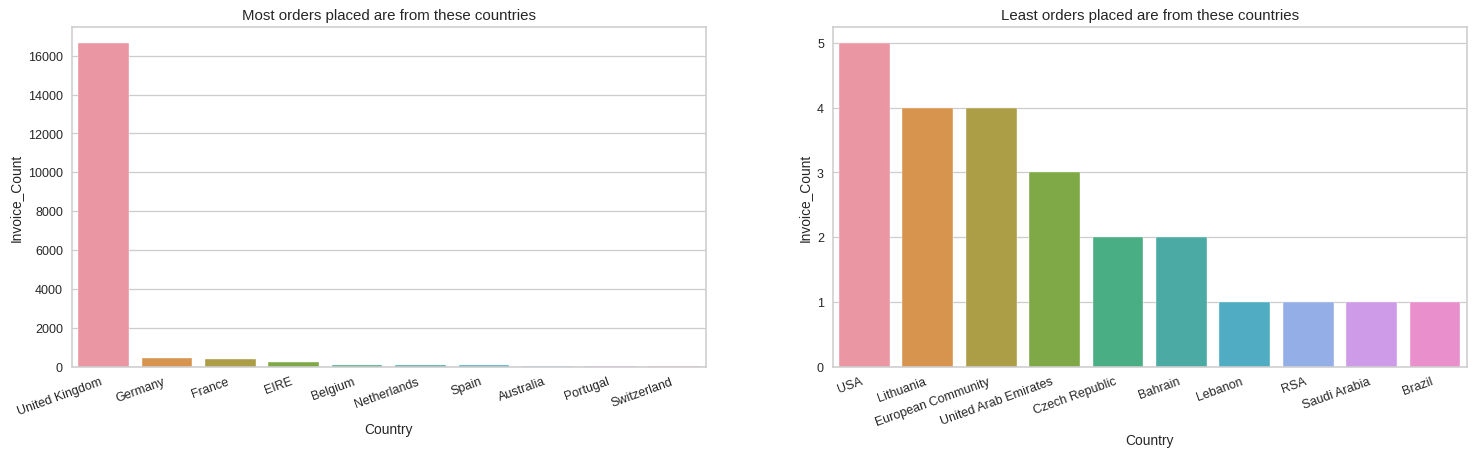

In [25]:
# Visualizing top and bottom 10 countries based on total invoices 
ttl1 = 'Most orders placed are from these countries'
ttl2 = 'Least orders placed are from these countries'
plot_bar(country_invoice,'Country','Invoice_Count',ttl1,ttl2)

In [26]:
# Most customers are from these countries
country_cust = df.groupby('Country')['CustomerID'].nunique().reset_index().sort_values('CustomerID', ascending=False)
country_cust.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
country_cust.head()

,Country,Customer_Count
35,United Kingdom,3921
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25


United Kingdom has most number of customers.

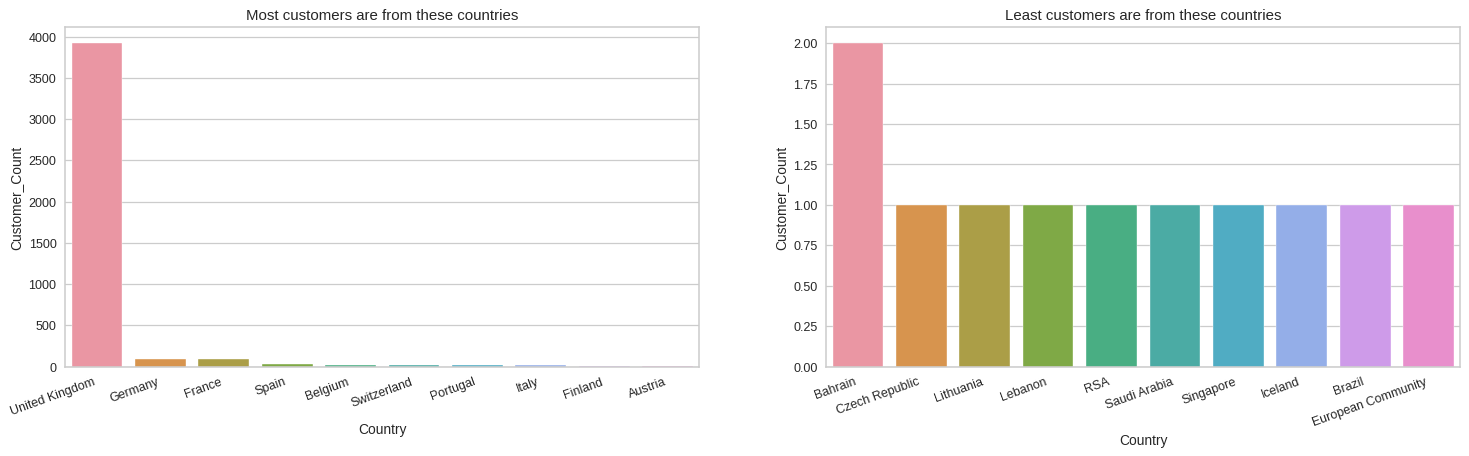

In [27]:
# Visualizing top and bottom 10 countries based on total customers 
ttl1 = 'Most customers are from these countries'
ttl2 = 'Least customers are from these countries'
plot_bar(country_cust,'Country','Customer_Count',ttl1,ttl2)

In [28]:
# Countrywise average item purchases
country_quantity = df.groupby('Country')['Quantity'].mean().round(2).reset_index().sort_values('Quantity',ascending=False)
country_quantity.rename(columns={'Quantity': 'Average_Quantity'}, inplace=True)
country_quantity.head()

,Country,Average_Quantity
23,Netherlands,85.03
19,Japan,81.05
31,Sweden,80.17
0,Australia,71.11
8,Czech Republic,26.84


Orders with mass quantity are placed by the customers from Netherlands.

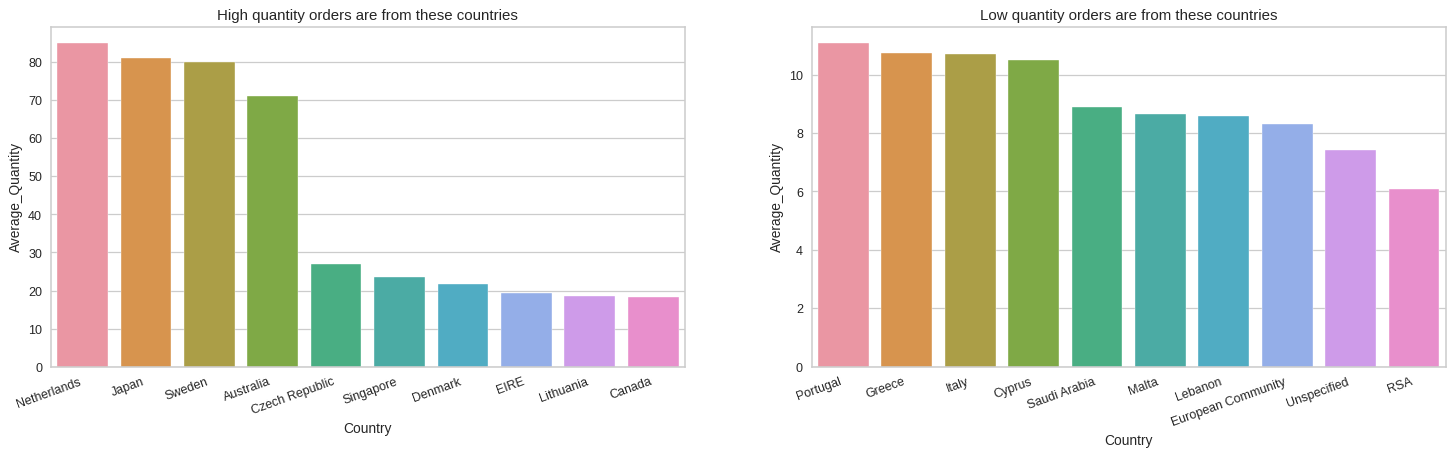

In [29]:
# Visualizing top and bottom 10 countries based on average item purchases 
ttl1 = 'High quantity orders are from these countries'
ttl2 = 'Low quantity orders are from these countries'
plot_bar(country_quantity,'Country','Average_Quantity',ttl1,ttl2)

In [30]:
# Quantity wise item purchases
product_quantity = df.groupby("Description")["Quantity"].sum().reset_index().sort_values("Quantity",ascending=False)
product_quantity.head()

,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1762,JUMBO BAG RED RETROSPOT,46078
3698,WHITE HANGING HEART T-LIGHT HOLDER,36706


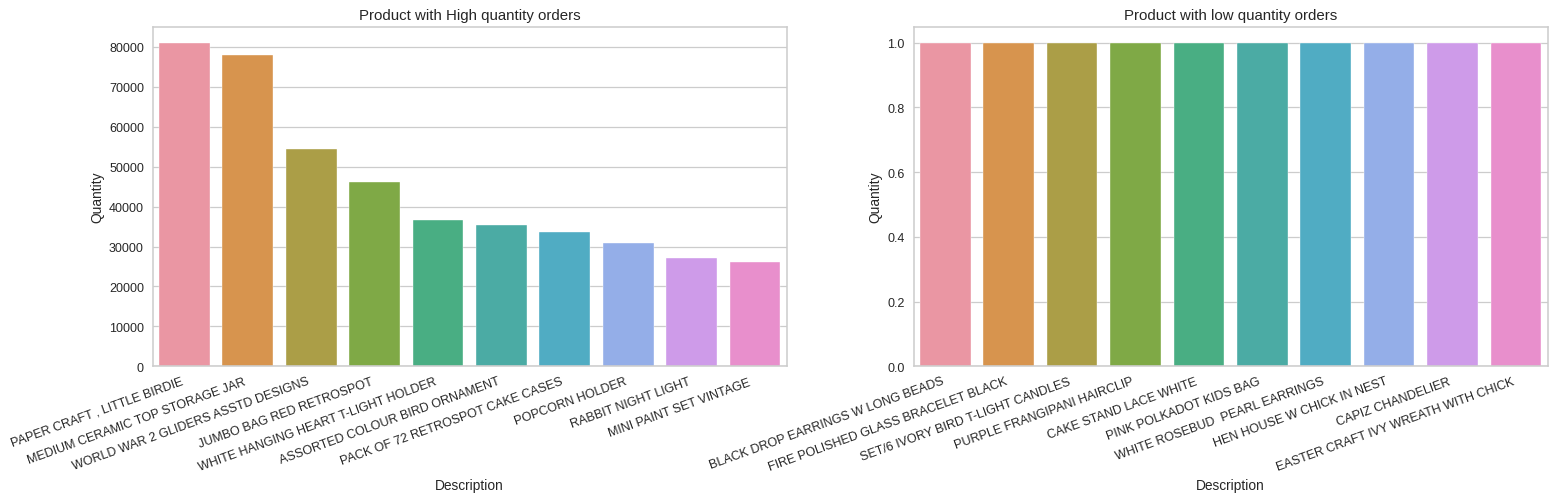

In [31]:
# Visualizing top and bottom 10 products based on purchase quantity
ttl1 = 'Product with High quantity orders'
ttl2 = 'Product with low quantity orders'
plot_bar(product_quantity,'Description','Quantity', ttl1, ttl2)